<a href="https://colab.research.google.com/github/akimi-yano/climbing-footwork-classification/blob/main/Climbing_Footwork_Classification_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

In this Google Colab file, I created a model using VGG16 on a set of sample images I collected on the internet.





# Import Libraries

In [1]:
# Google drive
from google.colab import drive

# Python libraries
import random
import itertools

# Basic libraries for data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm

# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model


# System libraries
import os
from pathlib import Path
import os.path

# Image Processing
from PIL import Image, ImageChops, ImageEnhance
import cv2

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
drive.mount('/content/drive')
# input_dir = '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_mini_dataset' # This is for testing
input_dir = '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset'
val = os.listdir(input_dir)
print(val)

Mounted at /content/drive
['toe_hook', 'others', 'heel_hook']


# Helper Functions

In [3]:
def check_image_format(input_dir):
  for dirpath, dirnames, filenames in os.walk(input_dir):
    for i, filename in enumerate(filenames):
      filepath = os.path.join(dirpath, filename)
      try:
          with Image.open(filepath) as img:

            print(f"Index: {i} - File Path: {filepath} - Actual Format: {img.format}") # The format should be PNG after Format Adjusting.
      except Exception as e:
          print(f"Error: {e}")

# Load Data

In [4]:
for dirpath, dirnames, filenames in os.walk(input_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset'.
There are 0 directories and 77 images in '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook'.
There are 0 directories and 124 images in '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/others'.
There are 0 directories and 106 images in '/content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/heel_hook'.


In [5]:
check_image_format(input_dir)

Index: 0 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/img9.png - Actual Format: PNG
Index: 1 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/img8.png - Actual Format: PNG
Index: 2 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/img7.png - Actual Format: PNG
Index: 3 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/img1.png - Actual Format: PNG
Index: 4 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/img10.png - Actual Format: PNG
Index: 5 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/result0_0.jpg - Actual Format: JPEG
Index: 6 - File Path: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/result0_1.jpg - Actual Format: JPEG
Index: 

# Adjust the Format to be PNG

Since the images I collected from the internet had different file formats, I converted the image files to have PNG format.


In [6]:
formatted__output_dir = '/content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset'

# Create output directory if it doesn't exist
if not os.path.exists(formatted__output_dir):
    os.makedirs(formatted__output_dir)
    print(f"Directory '{formatted__output_dir}' created.")
else:
    print(f"Directory '{formatted__output_dir}' already exists.")

# Traverse subdirectories and process files
for dir_name in os.listdir(input_dir):
    sub_dir_path = os.path.join(input_dir, dir_name)
    if os.path.isdir(sub_dir_path):
        for file_name in os.listdir(sub_dir_path):
            if file_name.endswith(('.WEBP', '.JPEG', '.webp', '.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                file_path = os.path.join(sub_dir_path, file_name)  # Full path to the file
                print(f"Processing: {file_path}")
                try:
                    with Image.open(file_path) as img:
                        # Save the image as PNG
                        output_sub_dir = os.path.join(formatted__output_dir, dir_name)
                        os.makedirs(output_sub_dir, exist_ok=True)  # Create subdirectory if it doesn't exist
                        output_path = os.path.join(output_sub_dir, os.path.splitext(file_name)[0] + ".png")
                        img.save(output_path, format="PNG")
                        print(f"Saved as PNG: {output_path}")
                except Exception as e:
                    print(f"Failed to process {file_name}: {e}")

Directory '/content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset' already exists.
Processing: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/img9.png
Saved as PNG: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/img9.png
Processing: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/img8.png
Saved as PNG: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/img8.png
Processing: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/img7.png
Saved as PNG: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/img7.png
Processing: /content/drive/MyDrive/ml-climbing-project/raw-climbing_footwork_large_dataset/toe_hook/img1.png
Saved as PNG: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/t

In [7]:
check_image_format(formatted__output_dir)

Index: 0 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/img7.png - Actual Format: PNG
Index: 1 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/result0_0.png - Actual Format: PNG
Index: 2 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/img9.png - Actual Format: PNG
Index: 3 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/img8.png - Actual Format: PNG
Index: 4 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/img10.png - Actual Format: PNG
Index: 5 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/img1.png - Actual Format: PNG
Index: 6 - File Path: /content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook/re

In [8]:
for dirpath, dirnames, filenames in os.walk(formatted__output_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset'.
There are 0 directories and 76 images in '/content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/toe_hook'.
There are 0 directories and 124 images in '/content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/others'.
There are 0 directories and 106 images in '/content/drive/MyDrive/ml-climbing-project/formatted-climbing_footwork_large_dataset/heel_hook'.


# Place the Dataset into Dataframe

In [9]:
image_dir = Path(formatted__output_dir)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
print("Filepath length: ", len(filepaths))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
print("Labels length: ", len(labels))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

Filepath length:  306
Labels length:  306


In [10]:
image_df

Filepath      Label
0    /content/drive/MyDrive/ml-climbing-project/for...   toe_hook
1    /content/drive/MyDrive/ml-climbing-project/for...   toe_hook
2    /content/drive/MyDrive/ml-climbing-project/for...   toe_hook
3    /content/drive/MyDrive/ml-climbing-project/for...   toe_hook
4    /content/drive/MyDrive/ml-climbing-project/for...   toe_hook
..                                                 ...        ...
301  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
302  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
303  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
304  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
305  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook

[306 rows x 2 columns]

In [11]:
image_df['Label'].value_counts()

Label
others       124
heel_hook    106
toe_hook      76
Name: count, dtype: int64

# Visualize Images from the Dataset

In [12]:
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
  ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()

# Error Level Analysis (ELA)

Creating a visualization of Error Level Analysis (ELA) for a random image selected from the dataset's heel_hook class.

Here are the purposes of this analysis:

1.   Identify image tampering or anomalies: ELA highlights subtle changes in compression artifacts, which can reveal areas of the image that have been altered or manipulated.
2.   Understand compression effects: By varying JPEG quality, you can observe how artifacts change at different compression levels.

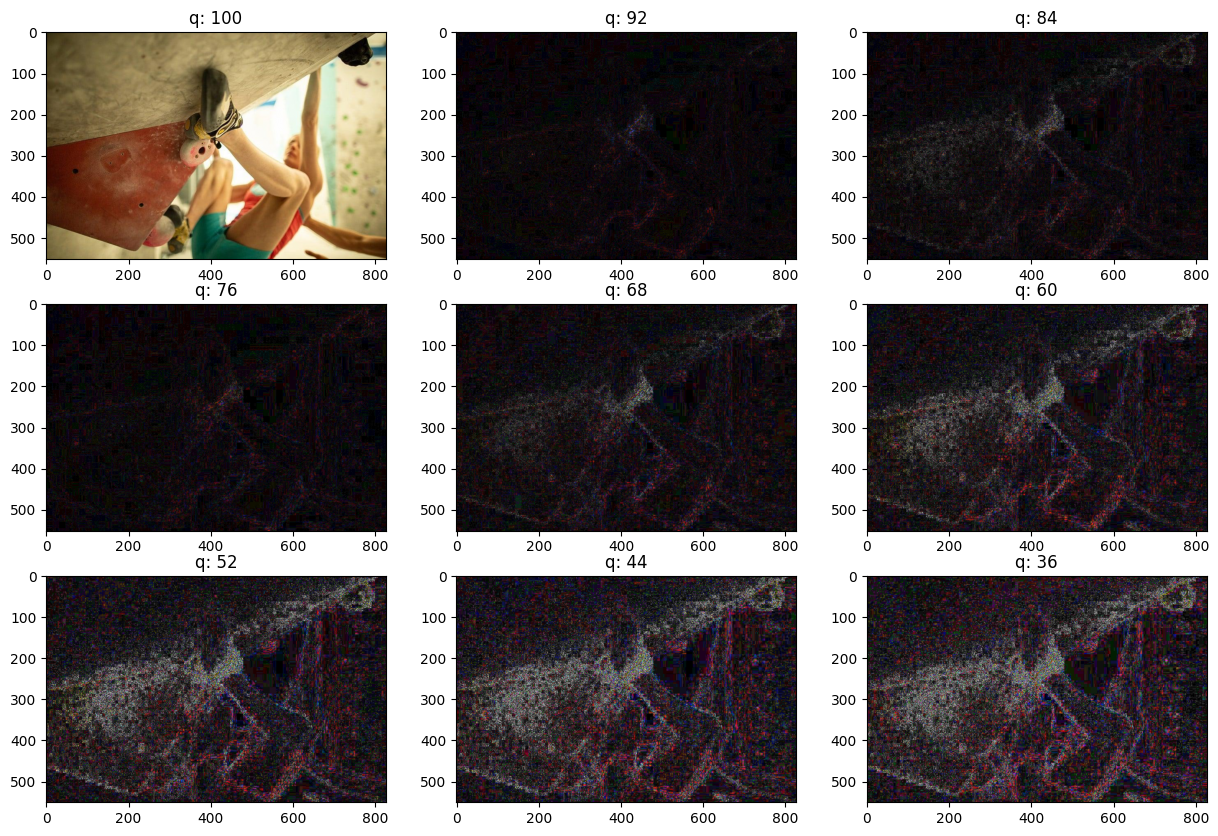

In [13]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff

def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGBA')
    image.save(temp_filename, 'RGBA', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image

def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')

    items = list(items)

    p = random.choice(items)
    return p.as_posix()

# View random sample from the dataset
p = random_sample(formatted__output_dir+'/heel_hook')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

# Split the Dataset

In [14]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=12)

In [15]:
train_df

Filepath      Label
161  /content/drive/MyDrive/ml-climbing-project/for...     others
254  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
77   /content/drive/MyDrive/ml-climbing-project/for...     others
174  /content/drive/MyDrive/ml-climbing-project/for...     others
47   /content/drive/MyDrive/ml-climbing-project/for...   toe_hook
..                                                 ...        ...
259  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
130  /content/drive/MyDrive/ml-climbing-project/for...     others
241  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
253  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
155  /content/drive/MyDrive/ml-climbing-project/for...     others

[244 rows x 2 columns]

In [16]:
test_df

Filepath      Label
151  /content/drive/MyDrive/ml-climbing-project/for...     others
280  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
220  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
217  /content/drive/MyDrive/ml-climbing-project/for...  heel_hook
192  /content/drive/MyDrive/ml-climbing-project/for...     others
..                                                 ...        ...
31   /content/drive/MyDrive/ml-climbing-project/for...   toe_hook
35   /content/drive/MyDrive/ml-climbing-project/for...   toe_hook
52   /content/drive/MyDrive/ml-climbing-project/for...   toe_hook
124  /content/drive/MyDrive/ml-climbing-project/for...     others
61   /content/drive/MyDrive/ml-climbing-project/for...   toe_hook

[62 rows x 2 columns]

In [18]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

In [19]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 196 validated image filenames belonging to 3 classes.
Found 48 validated image filenames belonging to 3 classes.
Found 62 validated image filenames belonging to 3 classes.


In [20]:
print("train_images.n: ", train_images.n)
print("val_images.n: ", val_images.n)
print("test_images.n: ", test_images.n)

print("train_images.batch_size: ", train_images.batch_size)
print("val_images.batch_size: ", val_images.batch_size)
print("test_images.batch_size: ", test_images.batch_size)

print("len(train_images): ", len(train_images))
print("len(val_images): ", len(val_images))
print("len(test_images): ", len(test_images))

train_images.n:  196
val_images.n:  48
test_images.n:  62
train_images.batch_size:  32
val_images.batch_size:  32
test_images.batch_size:  32
len(train_images):  7
len(val_images):  2
len(test_images):  2


In [21]:
print("train_images.class_indices:", train_images.class_indices)
print("val_images.class_indices:", val_images.class_indices)
print("test_images.class_indices:", test_images.class_indices)

train_images.class_indices: {'heel_hook': 0, 'others': 1, 'toe_hook': 2}
val_images.class_indices: {'heel_hook': 0, 'others': 1, 'toe_hook': 2}
test_images.class_indices: {'heel_hook': 0, 'others': 1, 'toe_hook': 2}


# Set up Resize, Rescale and Data Augumentation

In [22]:
# Setup Resizing and Rescaling
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224,224),
  tf.keras.layers.Rescaling(1./255),
])

# Setup Data Augmentation
data_augmentation = keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
], name="data_augmentation")

The above data processing steps will be added to the ML pipeline, and Tensorflow will apply the data proccessing in the following way under the hood:

<table>
  <tr>
    <th>Transformation</th>
    <th>Training Data</th>
    <th>Validation Data</th>
    <th>Test Data</th>
  </tr>
  <tr>
    <td>Resizing & Rescaling</td>
    <td style="background-color: lightgreen;">✅ Applied</td>
    <td style="background-color: lightgreen;">✅ Applied</td>
    <td style="background-color: lightgreen;">✅ Applied</td>
  </tr>
  <tr>
    <td>Data Augmentation</td>
    <td style="background-color: lightgreen;">✅ Applied</td>
    <td style="background-color: lightgray;">❌ Not Applied</td>
    <td style="background-color: lightgray;">❌ Not Applied</td>
  </tr>
</table>



In the next step, I will train models with increased number of data and compare the performance.

# Helper Functions

In [23]:
# create_tensorboard_callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [24]:
# plot_loss_curves

# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [25]:
# unzip_data

# Create function to unzip a zipfile into current working directory
# (since we're going to be downloading and unzipping a few files)
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [26]:
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [27]:
# compare_histories

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [28]:
# walk_through_dir

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [29]:
# Create a function to import an image and resize it to be able to be used with the model
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [30]:
# pred_and_plot

# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [31]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

# Training the Model

In [32]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 3
EPOCHS = 100

In [33]:

# Load the pretained model
pretrained_model = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg',
)

pretrained_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [34]:
# Create checkpoint callback
checkpoint_path = "climbing_footwork_classification_model_checkpoint.weights.h5"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [35]:
early_stopping = EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=30,
                                                  restore_best_weights=True)

In [36]:
print(pretrained_model.summary())

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [37]:
pretrained_model.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor>

In [38]:
pretrained_model.output

<KerasTensor shape=(None, 512), dtype=float32, sparse=False, name=keras_tensor_19>

In [39]:
# Use class weighing to penalize misclassification of minority classes
from sklearn.utils.class_weight import compute_class_weight

# Define class labels (numeric)
class_labels = np.array([0, 1, 2])  # Corresponding to 'toe_hook', 'heel_hook', 'others'

# Define dataset sizes
y_train = [0] * 77 + [1] * 106 + [2] * 124  # Labels repeated based on dataset sizes

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=class_labels, y=y_train)

# Convert to dictionary format for Keras
class_weights_dict = {i: class_weights[i] for i in range(len(class_labels))}

print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.329004329004329, 1: 0.9654088050314465, 2: 0.8252688172043011}


In [40]:
inputs = pretrained_model.input
# print(inputs)
x = resize_and_rescale(inputs)
# print(x)
x = data_augmentation(x)
# print(x)
x = Dense(256, activation='relu')(pretrained_model.output)
# print(x)
x = Dropout(0.2)(x)
# print(x)
x = Dense(256, activation='relu')(x)
# print(x)
x = Dropout(0.2)(x)
# print(x)

outputs = Dense(NUM_CLASSES, activation='softmax')(x)
# print(outputs)
model = Model(inputs=inputs, outputs=outputs)
# print(model)

model.compile(
    optimizer=Adam(0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=EPOCHS,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs",
                                    "climbing_footwork_classification"),
        checkpoint_callback,
    ],
    class_weight=class_weights_dict
)


Saving TensorBoard log files to: training_logs/climbing_footwork_classification/20250225-010638


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.2800 - loss: 5.9620 - val_accuracy: 0.3125 - val_loss: 4.5597
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3005 - loss: 5.3864 - val_accuracy: 0.2917 - val_loss: 4.1286
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2622 - loss: 5.2704 - val_accuracy: 0.3125 - val_loss: 3.7641
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2959 - loss: 4.3661 - val_accuracy: 0.3125 - val_loss: 3.4536
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2858 - loss: 4.7683 - val_accuracy: 0.3125 - val_loss: 3.1555
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2849 - loss: 3.9464 - val_accuracy: 0.3333 - val_loss: 2.8971
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3220 - loss: 3.8406 - val_accuracy: 0.2708 - val_loss: 2.6582
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2911 - loss: 3.5626 - val_accuracy: 0.2500 - val_loss: 2.4646
Epo

In [41]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,3

 Total params: 15,308,363 (58.40 MB)

 Trainable params: 197,891 (773.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 395,784 (1.51 MB)

In [42]:
history.history

{'accuracy': [0.29591837525367737,
  0.2908163368701935,
  0.27551019191741943,
  0.30102041363716125,
  0.30612245202064514,
  0.2908163368701935,
  0.3265306055545807,
  0.30102041363716125,
  0.3571428656578064,
  0.37755101919174194,
  0.3877550959587097,
  0.37755101919174194,
  0.30102041363716125,
  0.36734694242477417,
  0.34183672070503235,
  0.4030612111091614,
  0.3928571343421936,
  0.3877550959587097,
  0.41326531767845154,
  0.37755101919174194,
  0.45408162474632263,
  0.37755101919174194,
  0.36734694242477417,
  0.37755101919174194,
  0.4234693944454193,
  0.3469387888908386,
  0.4030612111091614,
  0.4030612111091614,
  0.4183673560619354,
  0.44897958636283875,
  0.37755101919174194,
  0.4234693944454193,
  0.3979591727256775,
  0.3571428656578064,
  0.44897958636283875,
  0.40816327929496765,
  0.5051020383834839,
  0.40816327929496765,
  0.4285714328289032,
  0.44387754797935486,
  0.3877550959587097,
  0.41326531767845154,
  0.4030612111091614,
  0.474489808082580

# Model Evaluation

In [43]:
results = model.evaluate(test_images, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 2.05978
Test Accuracy: 40.32%


# Visualizing loss curves

In [44]:
plot_loss_curves(history)

# Making predictions on the test data

In [45]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 697ms/step
The first 5 predictions: ['heel_hook', 'others', 'heel_hook', 'heel_hook', 'others']


In [46]:
# Display 15 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

# Plotting the classification reports and confusion matrix

In [47]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

   heel_hook       0.43      0.54      0.48        24
      others       0.35      0.44      0.39        18
    toe_hook       0.44      0.20      0.28        20

    accuracy                           0.40        62
   macro avg       0.41      0.40      0.38        62
weighted avg       0.41      0.40      0.39        62



In [48]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score    support
heel_hook      0.433333  0.541667  0.481481  24.000000
others         0.347826  0.444444  0.390244  18.000000
toe_hook       0.444444  0.200000  0.275862  20.000000
accuracy       0.403226  0.403226  0.403226   0.403226
macro avg      0.408535  0.395370  0.382529  62.000000
weighted avg   0.412093  0.403226  0.388664  62.000000